In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten, SimpleRNN, LSTM, GRU, Bidirectional 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/content/drive/MyDrive/review.csv")

In [3]:
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [4]:
from wordcloud import WordCloud

In [5]:
positive_review = ' '.join(df[df["sentiment"] == 1]["review"])
negative_review = ' '.join(df[df["sentiment"] == 0]["review"])

##Positive review

In [6]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

In [7]:
wc.generate(positive_review)

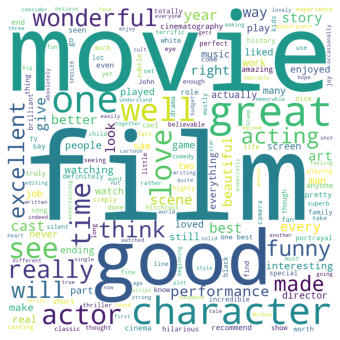

In [8]:
plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

##Negative review

In [9]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

In [10]:
wc.generate(negative_review)

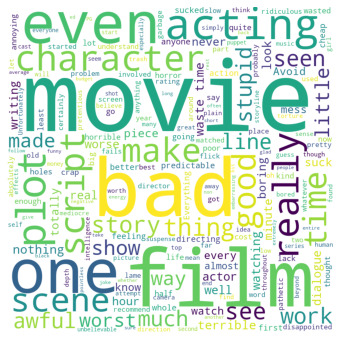

In [11]:
plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [12]:
# Feature and Target
X = df["review"]
y = df["sentiment"]

In [13]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [14]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [15]:
# vocabulary
tokenizer.index_word

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'is',
 6: 'this',
 7: 'it',
 8: 'i',
 9: 'to',
 10: 'in',
 11: 'was',
 12: 'movie',
 13: 'film',
 14: 'that',
 15: 'for',
 16: 'with',
 17: 'as',
 18: 'but',
 19: 'are',
 20: 'on',
 21: 'not',
 22: "it's",
 23: 'just',
 24: 'one',
 25: 'you',
 26: 'bad',
 27: 'an',
 28: 'all',
 29: 'so',
 30: 'about',
 31: 'at',
 32: 'very',
 33: 'there',
 34: 'like',
 35: 'good',
 36: 'by',
 37: 'from',
 38: 'have',
 39: 'time',
 40: 'he',
 41: 'out',
 42: 'even',
 43: 'acting',
 44: 'has',
 45: 'his',
 46: 'be',
 47: 'were',
 48: 'well',
 49: 'if',
 50: 'great',
 51: 'who',
 52: 'characters',
 53: 'how',
 54: 'more',
 55: 'my',
 56: 'or',
 57: 'really',
 58: 'see',
 59: 'when',
 60: 'some',
 61: 'than',
 62: 'no',
 63: 'best',
 64: 'plot',
 65: 'made',
 66: 'story',
 67: 'movies',
 68: 'character',
 69: "didn't",
 70: 'most',
 71: 'scenes',
 72: 'wonderful',
 73: 'its',
 74: 'better',
 75: "don't",
 76: '10',
 77: 'me',
 78: 'ever',
 79: 'they',
 80: 'what

In [16]:
vocab_len = len(tokenizer.index_word)
vocab_len

2486

In [17]:
# text to sequence
train_sequence = tokenizer.texts_to_sequences(X_train)

In [18]:
doc_len = []

for doc in train_sequence:
  doc_len.append(len(doc))

In [19]:
max(doc_len)

69

In [20]:
np.quantile(doc_len, 0.99)

45.0

In [21]:
max_length = 45

In [22]:
# padding
train_matrix = sequence.pad_sequences(train_sequence,max_length)
train_matrix

array([[  0,   0,   0, ..., 915, 532, 102],
       [  0,   0,   0, ...,   3, 377,  12],
       [  0,   0,   0, ...,   5, 378, 916],
       ...,
       [  0,   0,   0, ...,   3,  85,  12],
       [  0,   0,   0, ...,  20,   2,  20],
       [  0,   0,   0, ...,  22, 454, 840]], dtype=int32)

In [23]:
# test data
test_sequence = tokenizer.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequence,max_length)
test_matrix

array([[  0,   0,   0, ...,   3, 388, 111],
       [  0,   0,   0, ...,   9, 101,  77],
       [  0,   0,   0, ...,  42,  35,  15],
       ...,
       [  0,   0,   0, ...,   3,  35, 222],
       [  0,   0,   0, ...,  22,  23, 551],
       [  0,   0,   0, ...,  12,   5, 128]], dtype=int32)

##RNN

In [24]:
model = Sequential()
model.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model.add(SimpleRNN(64))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [25]:
model.compile(optimizer="adam",loss="binary_crossentropy")
model.fit(train_matrix,y_train,epochs=10,batch_size=128)

Epoch 1/10
6/6 [==============================] - 4s 72ms/step - loss: 0.6932
Epoch 2/10
6/6 [==============================] - 0s 58ms/step - loss: 0.6539
Epoch 3/10
6/6 [==============================] - 0s 64ms/step - loss: 0.5994
Epoch 4/10
6/6 [==============================] - 0s 63ms/step - loss: 0.4875
Epoch 5/10
6/6 [==============================] - 0s 58ms/step - loss: 0.3199
Epoch 6/10
6/6 [==============================] - 0s 55ms/step - loss: 0.1647
Epoch 7/10
6/6 [==============================] - 0s 67ms/step - loss: 0.0803
Epoch 8/10
6/6 [==============================] - 0s 67ms/step - loss: 0.0385
Epoch 9/10
6/6 [==============================] - 0s 62ms/step - loss: 0.0212
Epoch 10/10
6/6 [==============================] - 0s 68ms/step - loss: 0.0122


In [26]:
y_pred = model.predict(test_matrix)

In [27]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.60      0.58       151
           1       0.57      0.54      0.55       149

    accuracy                           0.57       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.57      0.57      0.57       300



## Multi-layer RNN

In [29]:
model1 = Sequential()
model1.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model1.add(SimpleRNN(64, return_sequences=True))
model1.add(SimpleRNN(64, return_sequences=True))
model1.add(SimpleRNN(64))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(32, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

In [30]:
model1.compile(optimizer="adam",loss="binary_crossentropy")
model1.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 9s 103ms/step - loss: 0.6997
Epoch 2/10
22/22 [==============================] - 2s 110ms/step - loss: 0.5184
Epoch 3/10
22/22 [==============================] - 3s 120ms/step - loss: 0.2296
Epoch 4/10
22/22 [==============================] - 2s 111ms/step - loss: 0.0728
Epoch 5/10
22/22 [==============================] - 3s 122ms/step - loss: 0.0220
Epoch 6/10
22/22 [==============================] - 3s 120ms/step - loss: 0.0094
Epoch 7/10
22/22 [==============================] - 2s 94ms/step - loss: 0.0107
Epoch 8/10
22/22 [==============================] - 1s 55ms/step - loss: 0.0030
Epoch 9/10
22/22 [==============================] - 1s 55ms/step - loss: 0.0023
Epoch 10/10
22/22 [==============================] - 1s 57ms/step - loss: 0.0020


In [31]:
y_pred = model1.predict(test_matrix)

In [32]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.61      0.57       151
           1       0.55      0.48      0.51       149

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.54      0.54      0.54       300



##Bidirectional RNN

In [34]:
model2 = Sequential()
model2.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model2.add(Bidirectional(SimpleRNN(64)))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(32, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

In [35]:
model2.compile(optimizer="adam",loss="binary_crossentropy")
model2.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 3s 38ms/step - loss: 0.6947
Epoch 2/10
22/22 [==============================] - 1s 37ms/step - loss: 0.6085
Epoch 3/10
22/22 [==============================] - 1s 38ms/step - loss: 0.3099
Epoch 4/10
22/22 [==============================] - 1s 36ms/step - loss: 0.0920
Epoch 5/10
22/22 [==============================] - 1s 38ms/step - loss: 0.0370
Epoch 6/10
22/22 [==============================] - 1s 38ms/step - loss: 0.0377
Epoch 7/10
22/22 [==============================] - 1s 37ms/step - loss: 0.0330
Epoch 8/10
22/22 [==============================] - 1s 37ms/step - loss: 0.0177
Epoch 9/10
22/22 [==============================] - 1s 37ms/step - loss: 0.0061
Epoch 10/10
22/22 [==============================] - 1s 37ms/step - loss: 0.0034


In [36]:
y_pred = model2.predict(test_matrix)

In [37]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.53      0.57       151
           1       0.58      0.66      0.62       149

    accuracy                           0.59       300
   macro avg       0.60      0.59      0.59       300
weighted avg       0.60      0.59      0.59       300



##LSTM

In [39]:
model3 = Sequential()
model3.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model3.add(LSTM(64))
model3.add(Dense(64, activation="relu"))
model3.add(Dense(32, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

In [40]:
model3.compile(optimizer="adam",loss="binary_crossentropy")
model3.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 9s 62ms/step - loss: 0.6926
Epoch 2/10
22/22 [==============================] - 1s 63ms/step - loss: 0.6525
Epoch 3/10
22/22 [==============================] - 2s 71ms/step - loss: 0.3704
Epoch 4/10
22/22 [==============================] - 2s 71ms/step - loss: 0.1381
Epoch 5/10
22/22 [==============================] - 2s 70ms/step - loss: 0.0516
Epoch 6/10
22/22 [==============================] - 2s 68ms/step - loss: 0.0204
Epoch 7/10
22/22 [==============================] - 1s 59ms/step - loss: 0.0138
Epoch 8/10
22/22 [==============================] - 1s 62ms/step - loss: 0.0105
Epoch 9/10
22/22 [==============================] - 1s 69ms/step - loss: 0.0053
Epoch 10/10
22/22 [==============================] - 2s 69ms/step - loss: 0.0035


In [41]:
y_pred = model3.predict(test_matrix)

In [42]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       151
           1       0.75      0.82      0.78       149

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



#Multidimentional LSTM

In [44]:
model4 = Sequential()
model4.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model4.add(LSTM(64, return_sequences=True))
model4.add(LSTM(64, return_sequences=True))
model4.add(LSTM(64))
model4.add(Dense(64, activation="relu"))
model4.add(Dense(32, activation="relu"))
model4.add(Dense(1, activation="sigmoid"))

In [45]:
model4.compile(optimizer="adam",loss="binary_crossentropy")
model4.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 15s 109ms/step - loss: 0.6932
Epoch 2/10
22/22 [==============================] - 2s 108ms/step - loss: 0.6433
Epoch 3/10
22/22 [==============================] - 2s 110ms/step - loss: 0.3348
Epoch 4/10
22/22 [==============================] - 3s 125ms/step - loss: 0.1732
Epoch 5/10
22/22 [==============================] - 5s 217ms/step - loss: 0.0987
Epoch 6/10
22/22 [==============================] - 3s 143ms/step - loss: 0.0473
Epoch 7/10
22/22 [==============================] - 4s 172ms/step - loss: 0.0290
Epoch 8/10
22/22 [==============================] - 4s 192ms/step - loss: 0.0213
Epoch 9/10
22/22 [==============================] - 5s 223ms/step - loss: 0.0150
Epoch 10/10
22/22 [==============================] - 2s 110ms/step - loss: 0.0048


In [49]:
y_pred = model4.predict(test_matrix)

In [50]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.73       151
           1       0.73      0.77      0.75       149

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



##Bidirectional LSTM

In [52]:
model5 = Sequential()
model5.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model5.add(Bidirectional(LSTM(64)))
model5.add(Dense(64, activation="relu"))
model5.add(Dense(32, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))

In [53]:
model5.compile(optimizer="adam",loss="binary_crossentropy")
model5.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 17s 74ms/step - loss: 0.6937
Epoch 2/10
22/22 [==============================] - 3s 115ms/step - loss: 0.6698
Epoch 3/10
22/22 [==============================] - 2s 108ms/step - loss: 0.4400
Epoch 4/10
22/22 [==============================] - 3s 125ms/step - loss: 0.1623
Epoch 5/10
22/22 [==============================] - 3s 136ms/step - loss: 0.0737
Epoch 6/10
22/22 [==============================] - 3s 147ms/step - loss: 0.0426
Epoch 7/10
22/22 [==============================] - 3s 124ms/step - loss: 0.0232
Epoch 8/10
22/22 [==============================] - 3s 113ms/step - loss: 0.0154
Epoch 9/10
22/22 [==============================] - 2s 114ms/step - loss: 0.0113
Epoch 10/10
22/22 [==============================] - 2s 106ms/step - loss: 0.0098


In [54]:
y_pred = model5.predict(test_matrix)

In [55]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       151
           1       0.79      0.72      0.76       149

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



##GRU

In [57]:
model6 = Sequential()
model6.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model6.add(GRU(64))
model6.add(Dense(64, activation="relu"))
model6.add(Dense(32, activation="relu"))
model6.add(Dense(1, activation="sigmoid"))

In [58]:
model6.compile(optimizer="adam",loss="binary_crossentropy")
model6.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 14s 90ms/step - loss: 0.6927
Epoch 2/10
22/22 [==============================] - 2s 78ms/step - loss: 0.6599
Epoch 3/10
22/22 [==============================] - 1s 65ms/step - loss: 0.3883
Epoch 4/10
22/22 [==============================] - 2s 80ms/step - loss: 0.1153
Epoch 5/10
22/22 [==============================] - 2s 79ms/step - loss: 0.0446
Epoch 6/10
22/22 [==============================] - 2s 77ms/step - loss: 0.0203
Epoch 7/10
22/22 [==============================] - 2s 82ms/step - loss: 0.0136
Epoch 8/10
22/22 [==============================] - 2s 80ms/step - loss: 0.0102
Epoch 9/10
22/22 [==============================] - 2s 74ms/step - loss: 0.0095
Epoch 10/10
22/22 [==============================] - 1s 65ms/step - loss: 0.0071


In [59]:
y_pred = model6.predict(test_matrix)

In [60]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       151
           1       0.76      0.70      0.73       149

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



##Multidimentional GRU

In [62]:
model7 = Sequential()
model7.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model7.add(GRU(64, return_sequences=True))
model7.add(GRU(64, return_sequences=True))
model7.add(GRU(64))
model7.add(Dense(64, activation="relu"))
model7.add(Dense(32, activation="relu"))
model7.add(Dense(1, activation="sigmoid"))

In [63]:
model7.compile(optimizer="adam",loss="binary_crossentropy")
model7.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 19s 98ms/step - loss: 0.6943
Epoch 2/10
22/22 [==============================] - 3s 158ms/step - loss: 0.6806
Epoch 3/10
22/22 [==============================] - 3s 155ms/step - loss: 0.3607
Epoch 4/10
22/22 [==============================] - 4s 199ms/step - loss: 0.1027
Epoch 5/10
22/22 [==============================] - 5s 222ms/step - loss: 0.0380
Epoch 6/10
22/22 [==============================] - 4s 182ms/step - loss: 0.0228
Epoch 7/10
22/22 [==============================] - 4s 167ms/step - loss: 0.0146
Epoch 8/10
22/22 [==============================] - 3s 154ms/step - loss: 0.0123
Epoch 9/10
22/22 [==============================] - 4s 168ms/step - loss: 0.0094
Epoch 10/10
22/22 [==============================] - 4s 179ms/step - loss: 0.0065


In [64]:
y_pred = model7.predict(test_matrix)

In [65]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       151
           1       0.75      0.73      0.74       149

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



##Bidirectional GRU

In [67]:
model8 = Sequential()
model8.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model8.add(Bidirectional(GRU(64)))
model8.add(Dense(64, activation="relu"))
model8.add(Dense(32, activation="relu"))
model8.add(Dense(1, activation="sigmoid"))

In [68]:
model8.compile(optimizer="adam",loss="binary_crossentropy")
model8.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 21s 91ms/step - loss: 0.6935
Epoch 2/10
22/22 [==============================] - 2s 90ms/step - loss: 0.6754
Epoch 3/10
22/22 [==============================] - 2s 112ms/step - loss: 0.4671
Epoch 4/10
22/22 [==============================] - 2s 100ms/step - loss: 0.1271
Epoch 5/10
22/22 [==============================] - 2s 107ms/step - loss: 0.0517
Epoch 6/10
22/22 [==============================] - 3s 117ms/step - loss: 0.0201
Epoch 7/10
22/22 [==============================] - 3s 127ms/step - loss: 0.0120
Epoch 8/10
22/22 [==============================] - 3s 127ms/step - loss: 0.0089
Epoch 9/10
22/22 [==============================] - 3s 129ms/step - loss: 0.0068
Epoch 10/10
22/22 [==============================] - 2s 100ms/step - loss: 0.0025


In [69]:
y_pred = model8.predict(test_matrix)

In [70]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       151
           1       0.78      0.70      0.74       149

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300

